<a href="https://colab.research.google.com/github/PratibhaSanganmath/EDA-Global_terrorism_analysis/blob/main/EDA_Global_terrorism.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Global Terrorism Database (GTD) is an open-source database including information on terrorist attacks around the world from 1970 through 2017. The GTD includes systematic data on domestic as well as international terrorist incidents that have occurred during this time period and now includes more than 180,000 attacks. The database is maintained by researchers at the National Consortium for the Study of Terrorism and Responses to Terrorism (START), headquartered at the University of Maryland.</b>

# <b> Explore and analyze the data to discover key findings pertaining to terrorist activities. </b>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Importing libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## lets read the data

In [3]:
#loading our csv file
file_path='/content/drive/MyDrive/Global Terrorism Data.csv'
df=pd.read_csv(file_path,engine='python')

In [4]:
df

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,...,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",...,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,...,NaN,NaN,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,East Asia,Fukouka,Fukouka,33.580412,130.396361,1.0,0,NaN,NaN,1,1,1,-9.0,NaN,NaN,0.0,1,0,7,Facility/Infrastructure Attack,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Consulate,...,NaN,NaN,Incendiary,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,201712310022,2017,12,31,NaN,0,NaN,182,Somalia,11,Sub-Saharan Africa,Middle Shebelle,Ceelka Geelow,2.359673,45.385034,2.0,0,The incident occurred near the town of Balcad.,12/31/2017: Assailants opened fire on a Somali...,1,1,0,1.0,1.0,Insurgency/Guerilla Action,0.0,1,0,2,Armed Assault,NaN,NaN,NaN,NaN,4,Military,36.0,Military Checkpoint,Somali National Army (SNA),Checkpoint,...,NaN,NaN,NaN,1.0,0.0,0.0,2.0,0.0,0.0,-9,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"""Somalia: Al-Shabaab Militants Attack Army Che...","""Highlights: Somalia Daily Media Highlights 2 ...","""Highlights: Somalia Daily Media Highlights 1 ...",START Primary Collection,0,0,0,0,NaN
181687,201712310029,20

In [5]:
df.info   # used to check the Information about the data and the datatypes of each respective attribute

<bound method DataFrame.info of              eventid  iyear  imonth  iday  ... INT_IDEO  INT_MISC INT_ANY  related
0       197000000001   1970       7     2  ...        0         0       0      NaN
1       197000000002   1970       0     0  ...        1         1       1      NaN
2       197001000001   1970       1     0  ...       -9         1       1      NaN
3       197001000002   1970       1     0  ...       -9         1       1      NaN
4       197001000003   1970       1     0  ...       -9         1       1      NaN
...              ...    ...     ...   ...  ...      ...       ...     ...      ...
181686  201712310022   2017      12    31  ...        0         0       0      NaN
181687  201712310029   2017      12    31  ...       -9         1       1      NaN
181688  201712310030   2017      12    31  ...        0         0       0      NaN
181689  201712310031   2017      12    31  ...       -9         0      -9      NaN
181690  201712310032   2017      12    31  ...       -9

In [6]:
df.shape   #The shape attribute tells us a number of observations and variables we have in the data set. It is used to check the dimension of data.
           # The given data set has 181691 observations and 135 variables in the data set.

(181691, 135)

In [7]:
#This method gives the overall descriptive summary of the dataframe
df.describe() 

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,vicinity,crit1,crit2,crit3,doubtterr,alternative,multiple,success,suicide,attacktype1,attacktype2,attacktype3,targtype1,targsubtype1,natlty1,targtype2,targsubtype2,natlty2,targtype3,targsubtype3,natlty3,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claim2,claimmode2,claim3,claimmode3,compclaim,weaptype1,weapsubtype1,weaptype2,weapsubtype2,weaptype3,weapsubtype3,weaptype4,weapsubtype4,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propvalue,ishostkid,nhostkid,nhostkidus,nhours,ndays,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,1.816910e+05,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181685.000000,181691.000000,181691.000000,181691.000000,181691.000000,181690.000000,29011.000000,181690.000000,181691.000000,181691.000000,181691.000000,6314.000000,428.000000,181691.000000,171318.000000,180132.000000,11144.000000,10685.000000,10828.000000,1176.000000,1097.000000,1147.000000,181311.000000,1955.000000,320.000000,181691.000000,110576.000000,112202.000000,115571.000000,19083.000000,1890.000000,616.000000,318.000000,133.000000,4839.000000,181691.000000,160923.000000,13127.000000,11542.000000,1863.000000,1693.000000,73.000000,70.000000,171378.000000,117245.000000,114733.000000,165380.000000,116989.000000,112548.000000,181691.000000,64065.000000,3.898900e+04,181513.000000,13572.000000,13517.000000,4063.000000,8124.000000,77381.000000,1.350000e+03,5.630000e+02,7.740000e+02,552.000000,10991.000000,10400.000000,181691.000000,181691.000000,181691.000000,181691.000000
mean,2.002705e+11,2002.638997,6.467277,15.505644,0.045346,131.968501,7.160938,23.498343,-4.586957e+02,1.451452,0.068297,0.988530,0.993093,0.875668,-0.523171,1.292923,0.137773,0.889598,0.036507,3.247547,3.719512,5.245327,8.439719,46.971474,127.686441,10.247218,55.311652,131.179442,10.021259,55.548769,144.564952,0.081440,0.265473,0.193750,0.002950,-65.361154,-1.517727,0.049666,7.022848,0.247619,7.176948,0.411950,6.729323,-6.296342,6.447325,11.117162,6.812524,10.754029,6.911433,11.643237,6.246575,10.842857,2.403272,0.045981,0.508058,3.167668,0.038944,0.107163,-0.544556,3.295403,2.088119e+05,0.059054,4.533230,-0.353999,-46.793933,-32.516371,-0.145811,3.172530e+06,5.784865e+05,7.179437e+05,240.378623,4.629242,-29.018269,-4.543731,-4.464398,0.090010,-3.945952
std,1.325957e+09,13.259430,3.388303,8.814045,0.208063,112.414535,2.933408,18.569242,2.047790e+05,0.995430,0.284553,0.106483,0.082823,0.329961,2.455819,0.703729,0.344663,0.313391,0.187549,1.915772,2.272023,2.246642,6.653838,30.953357,89.299120,5.709076,25.640310,125.951485,5.723447,26.288955,163.299295,0.273511,0.441698,0.395854,0.054234,216.536633,12.830346,1.093195,2.476851,0.974018,2.783725,0.492962,2.908003,4.234620,2.173435,6.495612,2.277081,7.594574,2.177956,8.493166,1.507212,8.192672,11.545741,5.681854,4.199937,35.949392,3.057361,1.488881,3.122889,0.486912,1.552463e+07,0.461244,202.316386,6.835645,82.800405,121.209205,1.207861,3.021157e+07,7.077924e+06,1.014392e+07,2940.967293,2.035360,65.720119,4.543547,4.637152,0.568457,4.691325
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,4.000000,1.000000,-53.154613,-8.618590e+07,1.000000,-9.000000,0.000000,0.000000,0.000000,-9.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000,4.000000,1.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,-99.000000,-99.000000,-9.000000,1.000000,-9.000000,1.000000,0.000000,1.000000,-9.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-9.000000,1.000000,-9.900000e+01,-9.000000,-99.000000,-99.000000,-99.000000,-99.000000,-9.000000,-9.900000e+01,-9.900000e+01,-9.900000e+01,-99.000000,1.000000,-99.000000,-9.000000,-9.000

In [8]:
print(list(df.columns))

['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended', 'resolution', 'country', 'country_txt', 'region', 'region_txt', 'provstate', 'city', 'latitude', 'longitude', 'specificity', 'vicinity', 'location', 'summary', 'crit1', 'crit2', 'crit3', 'doubtterr', 'alternative', 'alternative_txt', 'multiple', 'success', 'suicide', 'attacktype1', 'attacktype1_txt', 'attacktype2', 'attacktype2_txt', 'attacktype3', 'attacktype3_txt', 'targtype1', 'targtype1_txt', 'targsubtype1', 'targsubtype1_txt', 'corp1', 'target1', 'natlty1', 'natlty1_txt', 'targtype2', 'targtype2_txt', 'targsubtype2', 'targsubtype2_txt', 'corp2', 'target2', 'natlty2', 'natlty2_txt', 'targtype3', 'targtype3_txt', 'targsubtype3', 'targsubtype3_txt', 'corp3', 'target3', 'natlty3', 'natlty3_txt', 'gname', 'gsubname', 'gname2', 'gsubname2', 'gname3', 'gsubname3', 'motive', 'guncertain1', 'guncertain2', 'guncertain3', 'individual', 'nperps', 'nperpcap', 'claimed', 'claimmode', 'claimmode_txt', 'claim2', 'claimmode2', 'claim

## Droping the columns which contains more than 80 percent of null values

In [9]:
def missing_values(df, percentage):

    columns = df.columns
    percent_missing = df.isnull().sum() * 100 / len(df)
    missing_value_df = pd.DataFrame({'column_name': columns,
                                 'percent_missing': percent_missing})

    missing_drop = list(missing_value_df[missing_value_df.percent_missing>percentage].column_name)
    df = df.drop(missing_drop, axis=1)
    return df

In [10]:
df=df.drop(df.columns[df.apply(lambda col: col.isnull().sum()/len(df)>0.80)],axis=1)

In [11]:
df.shape

(181691, 67)

## Droping the unwanted columns

In [12]:
df=df.drop(columns=['extended','specificity', 'vicinity', 'crit1', 'crit2', 'crit3','doubtterr', 'multiple','attacktype1',
                    'guncertain1', 'individual', 'nkillus','nwoundus','scite1','scite2','scite3','propvalue','propcomment',
                    'property', 'ishostkid', 'dbsource','INT_LOG','nwoundte','weapsubtype1', 
                    'INT_IDEO', 'INT_MISC', 'INT_ANY','ransom','scite1','scite2','scite3','nperps'])

In [13]:
# Prints the total number of rows and columns present in a dataFrame after droping the unwanted columns
df.shape

(181691, 38)

In [14]:
# to print the columns present in the data frame after droping the unwanted columns
df.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'country', 'country_txt',
       'region', 'region_txt', 'provstate', 'city', 'latitude', 'longitude',
       'location', 'summary', 'success', 'suicide', 'attacktype1_txt',
       'targtype1', 'targtype1_txt', 'targsubtype1', 'targsubtype1_txt',
       'corp1', 'target1', 'natlty1', 'natlty1_txt', 'gname', 'motive',
       'nperpcap', 'claimed', 'weaptype1', 'weaptype1_txt', 'weapsubtype1_txt',
       'weapdetail', 'nkill', 'nkillter', 'nwound', 'propextent',
       'propextent_txt'],
      dtype='object')

## Handling missing value

In [15]:
df.isnull().sum() #number of null values in each column

eventid                  0
iyear                    0
imonth                   0
iday                     0
country                  0
country_txt              0
region                   0
region_txt               0
provstate              421
city                   434
latitude              4556
longitude             4557
location            126196
summary              66129
success                  0
suicide                  0
attacktype1_txt          0
targtype1                0
targtype1_txt            0
targsubtype1         10373
targsubtype1_txt     10373
corp1                42550
target1                636
natlty1               1559
natlty1_txt           1559
gname                    0
motive              131130
nperpcap             69489
claimed              66120
weaptype1                0
weaptype1_txt            0
weapsubtype1_txt     20768
weapdetail           67670
nkill                10313
nkillter             66958
nwound               16311
propextent          117626
p

## Renaming the columns

In [16]:
df=df.rename(columns={'eventid':'event_id','iyear':'year','imonth':'month','iday':'day','country_txt':'country_name','region_txt':'region_name','attacktype1_txt':'type_of_attack',
                      'targtype1_txt':'target_type','targsubtype1_txt':'sub_target_type','gname':'terrorist_gang_name', 'weaptype1_txt':'weapon_type', 'nkill':'number_of_kill',
                      'nwound':'number_of_wound','targtype1':'target_type1','weaptype1':'weapon_type1','natlty1':'nationality'})

Now lets plot them all

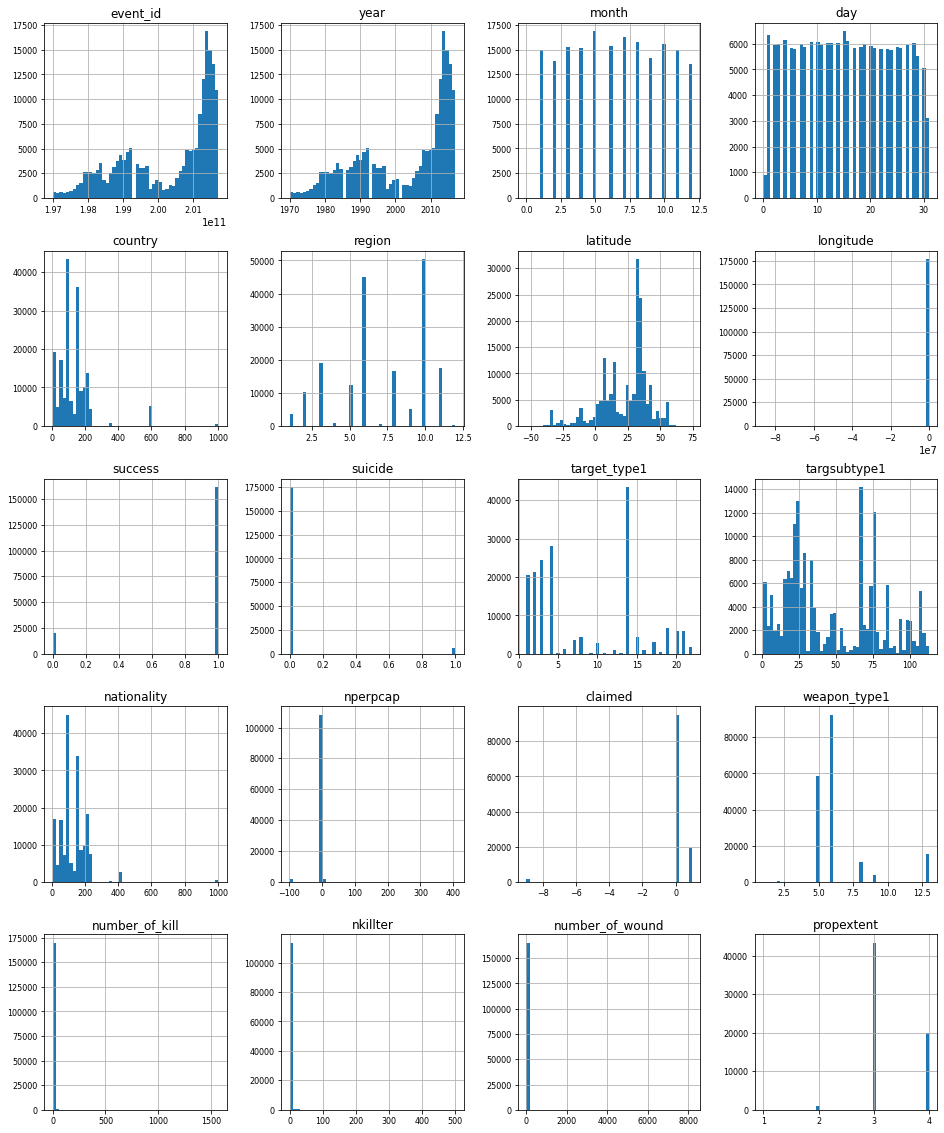

In [17]:
df.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

In [18]:
# To calculate the total number of attacks in a particular years
attacks_in_a_year = df["year"].value_counts()
attacks_in_a_year.sort_index(inplace=True)

In [19]:
attacks_in_a_year

1970      651
1971      471
1972      568
1973      473
1974      581
1975      740
1976      923
1977     1319
1978     1526
1979     2662
1980     2662
1981     2586
1982     2544
1983     2870
1984     3495
1985     2915
1986     2860
1987     3183
1988     3721
1989     4324
1990     3887
1991     4683
1992     5071
1994     3456
1995     3081
1996     3058
1997     3197
1998      934
1999     1395
2000     1814
2001     1906
2002     1333
2003     1278
2004     1166
2005     2017
2006     2758
2007     3242
2008     4805
2009     4721
2010     4826
2011     5076
2012     8522
2013    12036
2014    16903
2015    14965
2016    13587
2017    10900
Name: year, dtype: int64

## total attacks by terrorists

In [20]:
attacks_in_a_year.sum()

181691

In [21]:
# to know in which year maximum terrorist attacks are done 
year_of_max_attacks=df['year'].value_counts()
year_of_max_attacks[:1]

2014    16903
Name: year, dtype: int64

Text(0.5, 0, 'year')

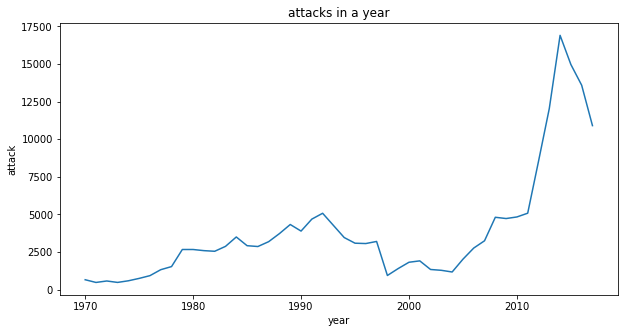

In [22]:
plt.rcParams['figure.figsize'] = (10, 5)
plt.plot(attacks_in_a_year)
plt.title('attacks in a year')
plt.ylabel('attack')
plt.xlabel('year')

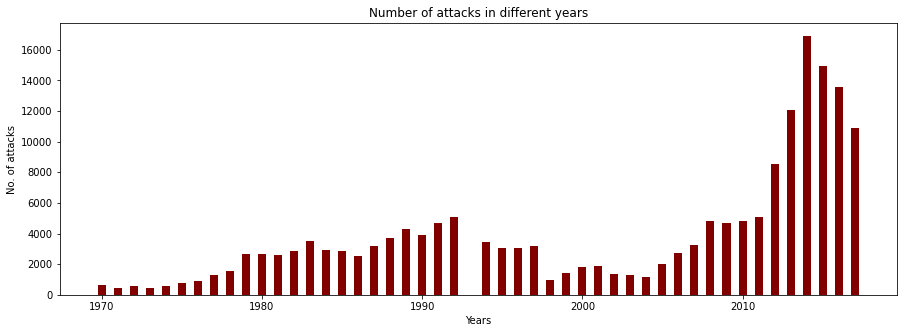

In [23]:
x= df['year'].unique()
y= df['year'].value_counts().sort_index()
plt.figure(figsize=(15,5))
plt.bar(x, y,color='maroon',width=0.5)
plt.xlabel("Years")
plt.ylabel("No. of attacks")
plt.title("Number of attacks in different years")
plt.show()

## To know which month of the year and in which year maximum attacks were done

In [24]:
grouped=df.groupby(['year','month'])['month'].count().unstack()

Text(0.5, 0, 'year')

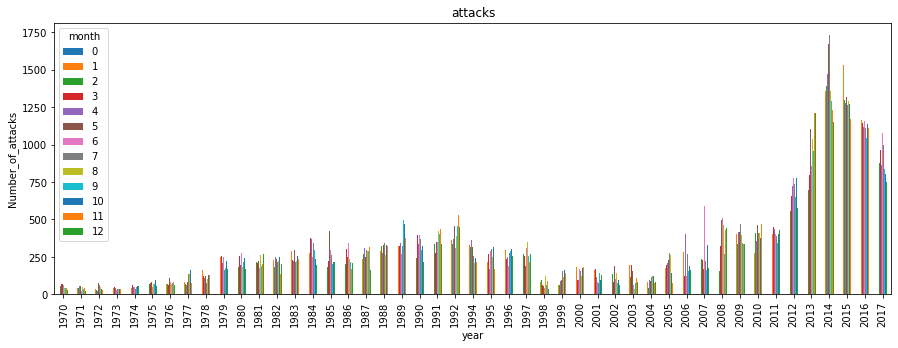

In [25]:
plt.rcParams['figure.figsize'] = (15, 5)
grouped.plot(kind='bar')
plt.title('attacks')
plt.ylabel('Number_of_attacks')
plt.xlabel('year')

Text(0.5, 0, 'year')

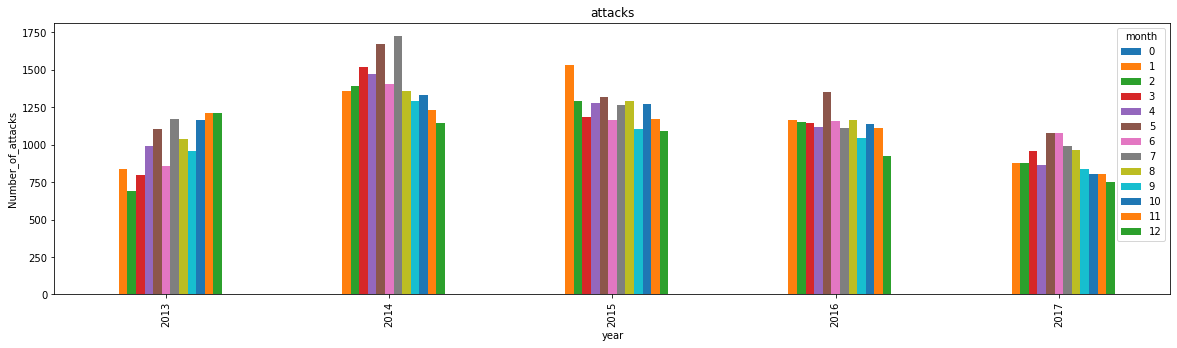

In [26]:
plt.rcParams['figure.figsize'] = (20, 5)
grouped.tail().plot(kind='bar')
plt.title('attacks')
plt.ylabel('Number_of_attacks')
plt.xlabel('year')

In [27]:
# To know the which terrorist gang has attacked the most till date
most_attacked_group=df['terrorist_gang_name'][df['year'].value_counts().max()]
most_attacked_group

'Basque Fatherland and Freedom (ETA)'

In [28]:
# most attacked countries by the terrorist
most_attacked_countrys=df['country_name'][df['country_name'].value_counts()]
most_attacked_countrys.head() # Prints the top 5 most attacked countries

24636      El Salvador
14368             Peru
12731      El Salvador
11960    United States
8306         Nicaragua
Name: country_name, dtype: object

In [29]:
# Know the most attacked regions
most_attacked_region=pd.DataFrame(df['region_name'].value_counts())
print("most attacked regions :\n")
print(most_attacked_region.head()) #Prints top 5 attacked regions
print("\nleast attacked regions :\n")
most_attacked_region.tail()  #Prints the 5 least attacked regions

most attacked regions :

                            region_name
Middle East & North Africa        50474
South Asia                        44974
South America                     18978
Sub-Saharan Africa                17550
Western Europe                    16639

least attacked regions :



,region_name
Eastern Europe,5144
North America,3456
East Asia,802
Central Asia,563
Australasia & Oceania,282


## To know how many terrorist attacks are done in the region with corresponding years

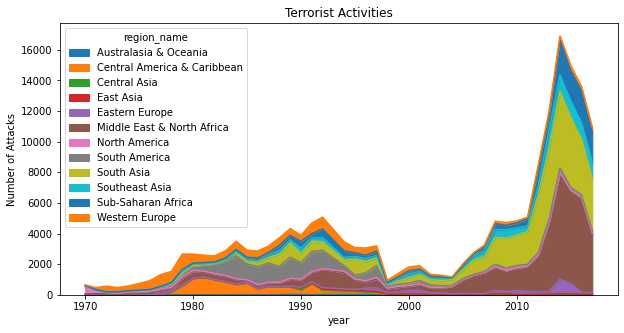

In [30]:
pd.crosstab(df.year,df.region_name).plot(kind='area',figsize=(10,5))
plt.title('Terrorist Activities')
plt.ylabel('Number of Attacks')
plt.show()

In [55]:
#to check which region is affected by terrorism in each year
from ipywidgets import interact, interact_manual
@interact

def attack_year(year=list(df["year"].unique())):
    a=df[df["year"]==year]
    return sns.countplot(y=a["region_name"], palette="viridis")

interactive(children=(Dropdown(description='year', options=(1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 19…

## To know the different attack types used by terrorists and how many times they used the same

In [31]:
attack_type=pd.DataFrame(df['type_of_attack'].value_counts())
attack_type

,type_of_attack
Bombing/Explosion,88255
Armed Assault,42669
Assassination,19312
Hostage Taking (Kidnapping),11158
Facility/Infrastructure Attack,10356
Unknown,7276
Unarmed Assault,1015
Hostage Taking (Barricade Incident),991
Hijacking,659


from the above code, we know that in the most attacks terrorists used bombing/Explosion and armed assault

## Attacks succeeded by the terrorists

In [32]:
succeeded = df[df['success'] ==1]  
succeeded[['terrorist_gang_name','country_name','region_name','type_of_attack']]

,terrorist_gang_name,country_name,region_name,type_of_attack
0,MANO-D,Dominican Republic,Central America & Caribbean,Assassination
1,23rd of September Communist League,Mexico,North America,Hostage Taking (Kidnapping)
2,Unknown,Philippines,Southeast Asia,Assassination
3,Unknown,Greece,Western Europe,Bombing/Explosion
4,Unknown,Japan,East Asia,Facility/Infrastructure Attack
...,...,...,...,...
181684,Zeliangrong United Front,India,South Asia,Hostage Taking (Kidnapping)
181685,Unknown,Afghanistan,South Asia,Bombing/Explosion
181686,Al-Shabaab,Somalia,Sub-Saharan Africa,Armed Assault
181687,Muslim extremists,Syria,Middle East & North Africa,Bombing/Explosion


## Failed terrorist attacks

In [33]:
attacks_failed=df[df['success']==0]
attacks_failed[['terrorist_gang_name','country_name','region_name','type_of_attack']]

,terrorist_gang_name,country_name,region_name,type_of_attack
6,Tupamaros (Uruguay),Uruguay,South America,Assassination
10,"Weather Underground, Weathermen",United States,North America,Bombing/Explosion
23,Student Radicals,United States,North America,Bombing/Explosion
39,New People's Army (NPA),Philippines,Southeast Asia,Unknown
43,Unknown,United States,North America,Facility/Infrastructure Attack
...,...,...,...,...
181650,Unknown,Pakistan,South Asia,Bombing/Explosion
181674,Islamic State of Iraq and the Levant (ISIL),Iraq,Middle East & North Africa,Unknown
181679,Islamic State of Iraq and the Levant (ISIL),Iraq,Middle East & North Africa,Armed Assault
181689,Unknown,India,South Asia,Bombing/Explosion


In [34]:
print("the total attacks made by terrorists : ",len(df.index))
print("succeeded attacks : ",len(succeeded.index))
print("attacks_failed    : ",len(attacks_failed.index))

the total attacks made by terrorists :  181691
succeeded attacks :  161632
attacks_failed    :  20059


In [35]:
def no_of_people_affected(number_of_kill, number_of_wound):
  if number_of_kill >0 | number_of_wound>0:
    no_of_people_affected = number_of_kill + number_of_wound
  else:
    no_of_people_affected= np.nan
    
  return no_of_people_affected

In [36]:
#df['number_of_kill']=df['number_of_kill'].replace(np.nan,0).astype(int)
#df['number_of_wound']=df['number_of_wound'].replace(np.nan,0).astype(int)
#df['no_of_people_affected'] = df.apply(lambda x: no_of_people_affected(x['number_of_kill'], x['number_of_wound']),axis=1)
df['number_of_kill']=df['number_of_kill'].fillna(0)
df['number_of_wound']=df['number_of_wound'].fillna(0)
df['no_of_people_affected']=df['number_of_kill']+df['number_of_wound']

In [37]:
print("The number of people killed by terrorist attack = ",df['number_of_kill'].sum())
print("The number of people wounded in terrorist attack = ",df['number_of_wound'].sum())
print("the total number of people affected by terrorist attack = ",df['no_of_people_affected'].sum())

The number of people killed by terrorist attack =  411868.0
The number of people wounded in terrorist attack =  523869.0
the total number of people affected by terrorist attack =  935737.0


In [38]:
attacks_done_in_years=df.groupby(['year'])['terrorist_gang_name'].value_counts()
attacks_done_in_years

year  terrorist_gang_name                         
1970  Unknown                                         115
      Left-Wing Militants                             108
      Black Nationalists                               69
      Student Radicals                                 54
      Tupamaros (Uruguay)                              33
                                                     ... 
2017  United Achik National Front (UANF)                1
      United Baloch Army (UBA)                          1
      United Party for National Development (UPND)      1
      United Tribal Liberation Army (UTLA)              1
      Zagros Eagles                                     1
Name: terrorist_gang_name, Length: 9038, dtype: int64

In [39]:
year=df['year'].unique()
attacks_in_year=df.groupby('year').agg('sum')
attacks_in_year.head()

,event_id,month,day,country,region,latitude,longitude,success,suicide,target_type1,targsubtype1,nationality,nperpcap,claimed,weapon_type1,number_of_kill,nkillter,number_of_wound,propextent,no_of_people_affected
year,,,,,,,,,,,,,,,,,,,,
1970,128250997891467,3908,9685,139865,1578,20550.788172,-44920.817635,549,0,3816,22565.0,131511.0,-33390.0,31.0,4523,174.0,15.0,212.0,1278.0,386.0
1971,92836955370915,2784,7137,128491,1992,17210.235146,-23633.523776,420,0,2413,14389.0,94053.0,-12041.0,26.0,3106,173.0,4.0,82.0,834.0,255.0
1972,112013627541685,3935,9631,220168,3951,24004.441063,-5828.724123,452,0,4245,24576.0,108450.0,-9984.0,96.0,3362,566.0,18.0,409.0,396.0,975.0
1973,93325992410863,3021,7141,152606,2924,15718.072031,-9899.455487,433,0,3537,20151.0,86751.0,-1357.0,-9.0,3066,370.0,21.0,495.0,339.0,865.0
1974,114693333521304,3849,8870,174313,3482,19218.059261,-13098.568639,545,0,3834,21532.0,103473.0,-4146.0,-98.0,3646,539.0,22.0,865.0,563.0,1404.0


In [40]:
attacks_in_year[['success','number_of_kill','number_of_wound','no_of_people_affected']][-5:]

,success,number_of_kill,number_of_wound,no_of_people_affected
year,,,,
2013,10484,22273.0,37688.0,59961.0
2014,15015,44490.0,41128.0,85618.0
2015,12676,38853.0,44043.0,82896.0
2016,10975,34871.0,40001.0,74872.0
2017,8652,26445.0,24927.0,51372.0


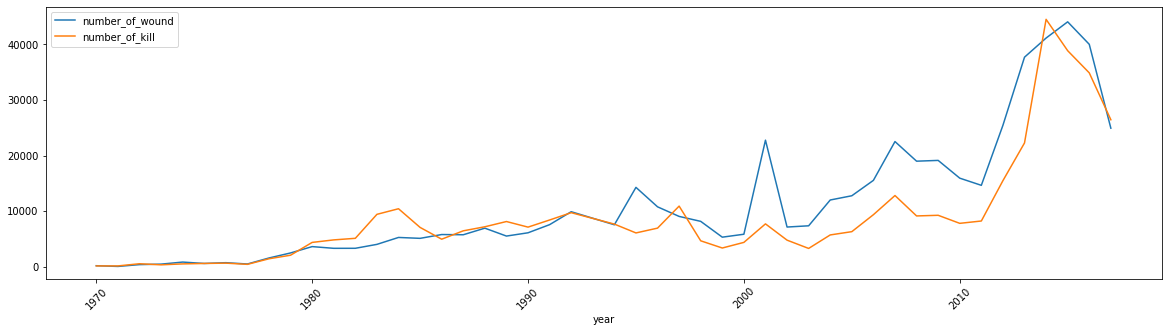

In [41]:
attacks_in_year[['number_of_wound','number_of_kill']].plot()
plt.xticks(rotation=45)
plt.show()

In [42]:
tgang_kills= df[['terrorist_gang_name','number_of_kill']].groupby(['terrorist_gang_name']).sum().sort_values('number_of_kill', ascending='False').reset_index()
tgang_kills.tail()

,terrorist_gang_name,number_of_kill
3532,Shining Path (SL),11601.0
3533,Boko Haram,20328.0
3534,Taliban,29410.0
3535,Islamic State of Iraq and the Levant (ISIL),38923.0
3536,Unknown,112367.0


In [43]:
df.columns

Index(['event_id', 'year', 'month', 'day', 'country', 'country_name', 'region',
       'region_name', 'provstate', 'city', 'latitude', 'longitude', 'location',
       'summary', 'success', 'suicide', 'type_of_attack', 'target_type1',
       'target_type', 'targsubtype1', 'sub_target_type', 'corp1', 'target1',
       'nationality', 'natlty1_txt', 'terrorist_gang_name', 'motive',
       'nperpcap', 'claimed', 'weapon_type1', 'weapon_type',
       'weapsubtype1_txt', 'weapdetail', 'number_of_kill', 'nkillter',
       'number_of_wound', 'propextent', 'propextent_txt',
       'no_of_people_affected'],
      dtype='object')

In [44]:
#Terrorist group names and number of killed 
group_killed= df[['terrorist_gang_name','number_of_kill']].groupby(['terrorist_gang_name'],axis=0).sum().sort_values('number_of_kill', ascending=False).head(15)
group_killed.reset_index()

,terrorist_gang_name,number_of_kill
0,Unknown,112367.0
1,Islamic State of Iraq and the Levant (ISIL),38923.0
2,Taliban,29410.0
3,Boko Haram,20328.0
4,Shining Path (SL),11601.0
5,Liberation Tigers of Tamil Eelam (LTTE),10989.0
6,Al-Shabaab,9330.0
7,Farabundo Marti National Liberation Front (FMLN),8065.0
8,Nicaraguan Democratic Force (FDN),6662.0
9,Tehrik-i-Taliban Pakistan (TTP),6042.0


##People Killed by each terrorist group in terrorist activity

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


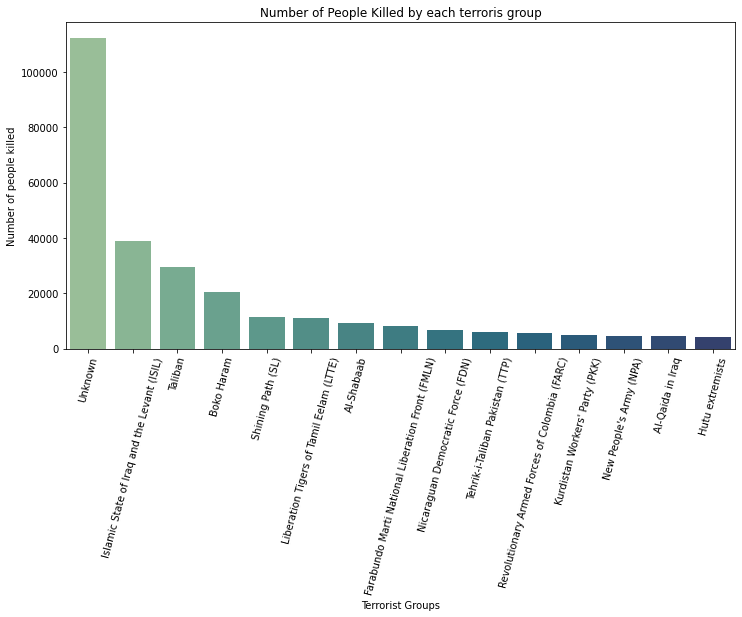

In [45]:
## People Killed by each group in terrorist activity
plt.subplots(figsize=(12,6))
sns.barplot(group_killed.index, group_killed.number_of_kill.values,palette="crest")
plt.title('Number of People Killed by each terroris group')
plt.xlabel('Terrorist Groups')
plt.ylabel('Number of people killed')
plt.xticks(rotation= 75)
plt.show()

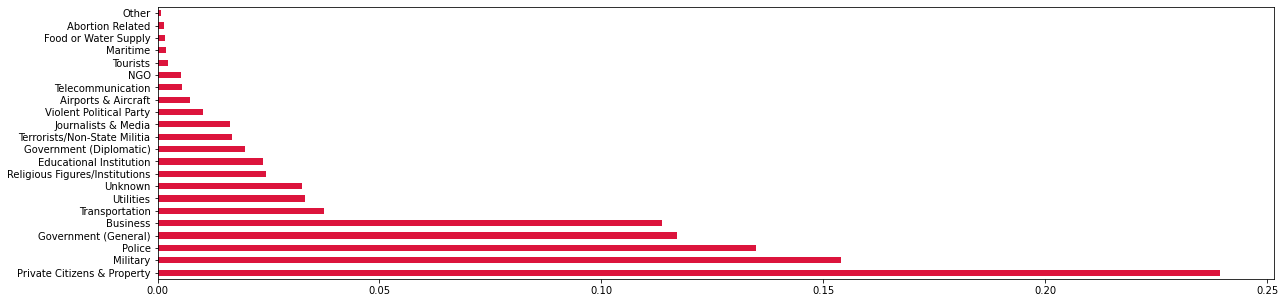

In [46]:
df.target_type.value_counts(normalize=True).plot(kind='barh',color='crimson')
plt.show()

In [47]:
df['target_type'].value_counts()

Private Citizens & Property       43511
Military                          27984
Police                            24506
Government (General)              21283
Business                          20669
Transportation                     6799
Utilities                          6023
Unknown                            5898
Religious Figures/Institutions     4440
Educational Institution            4322
Government (Diplomatic)            3573
Terrorists/Non-State Militia       3039
Journalists & Media                2948
Violent Political Party            1866
Airports & Aircraft                1343
Telecommunication                  1009
NGO                                 970
Tourists                            440
Maritime                            351
Food or Water Supply                317
Abortion Related                    263
Other                               137
Name: target_type, dtype: int64

From above outcome, the most attacks were done on private citizens and properties followed by military, police and government

In [48]:
weapon_used=df[['weapon_type']].value_counts()
weapon_used

weapon_type                                                                
Explosives                                                                     92426
Firearms                                                                       58524
Unknown                                                                        15157
Incendiary                                                                     11135
Melee                                                                           3655
Chemical                                                                         321
Sabotage Equipment                                                               141
Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)      136
Other                                                                            114
Biological                                                                        35
Fake Weapons                                                              

In [49]:
weapon_used_by_gang=df.groupby(['year'])['terrorist_gang_name'].value_counts()
weapon_used_by_gang

year  terrorist_gang_name                         
1970  Unknown                                         115
      Left-Wing Militants                             108
      Black Nationalists                               69
      Student Radicals                                 54
      Tupamaros (Uruguay)                              33
                                                     ... 
2017  United Achik National Front (UANF)                1
      United Baloch Army (UBA)                          1
      United Party for National Development (UPND)      1
      United Tribal Liberation Army (UTLA)              1
      Zagros Eagles                                     1
Name: terrorist_gang_name, Length: 9038, dtype: int64

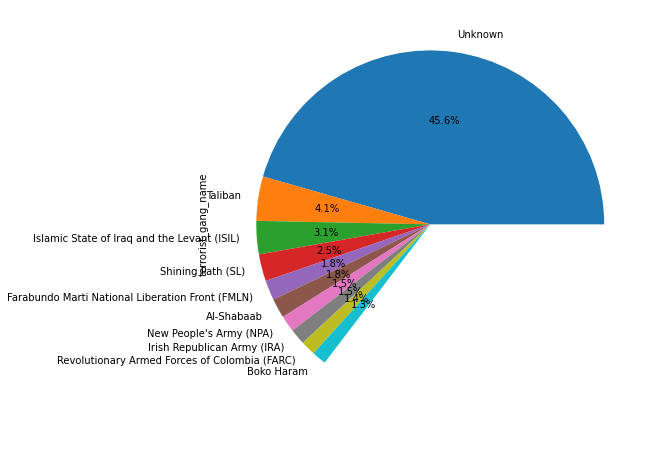

In [50]:
#plot the pie chart of terrorist gang name categories

df1=df.terrorist_gang_name.value_counts(normalize=True,ascending=False)
df1.head(10).plot.pie(autopct="%.1f%%",figsize=(10,8))
plt.show()

From the above fig, we can say that maximum terrorists attacks done by are unknown, then followed by Taliban

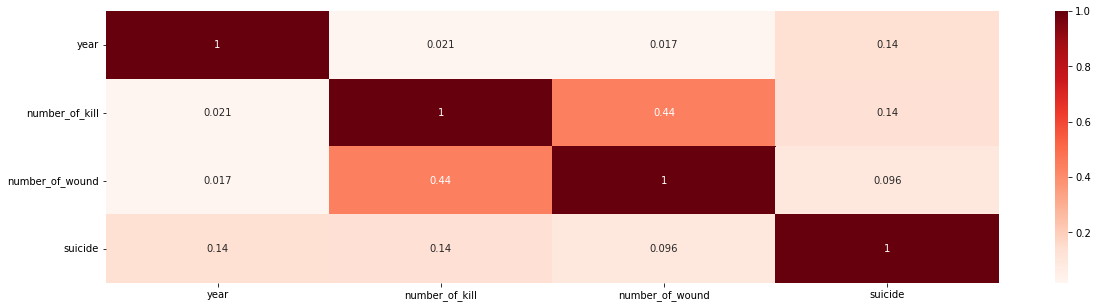

In [51]:
#we created a matrix using year, number of kills,number of wounds, and suicide. After that, we are plotting the heatmap using the seaborn library of the matrix
sns.heatmap(df[['year','number_of_kill','number_of_wound','suicide']].corr(), annot=True, cmap = 'Reds')